In [2]:
# import important libraries
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('titanic_train.csv')

In [9]:
df.shape

(891, 12)

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [91]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

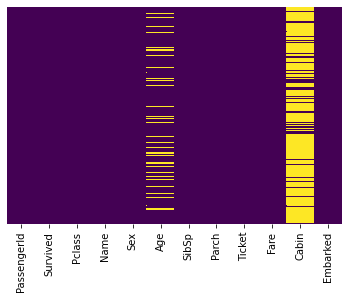

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
#find % of null_values
df['cabin_null'].mean()

0.7710437710437711

77% of cabin values are null

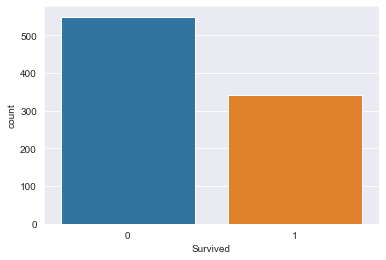

In [19]:
sns.set_style('darkgrid')
sns.countplot(df['Survived'])

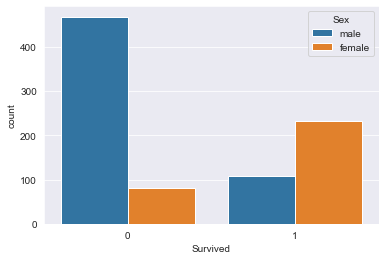

In [20]:
sns.countplot(x='Survived',hue='Sex',data=df)

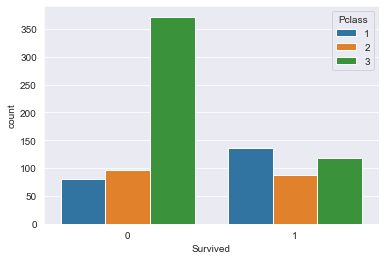

In [21]:
sns.countplot(x="Survived",hue="Pclass",data=df)

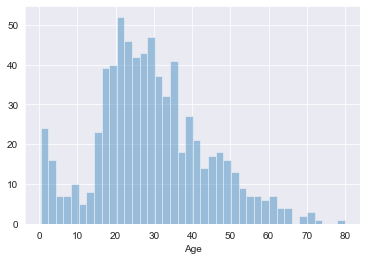

In [27]:
sns.distplot(df['Age'].dropna(),kde=False,bins=40)

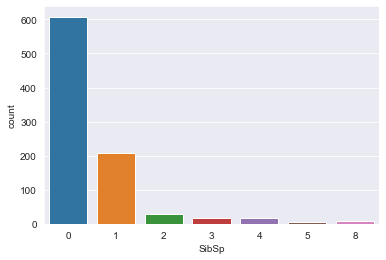

In [28]:
sns.countplot(df['SibSp'])

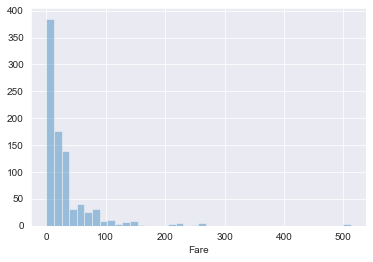

In [32]:
sns.distplot(df['Fare'],kde=False,bins=40)

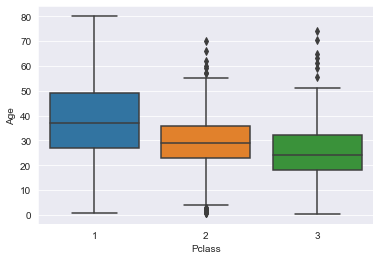

In [34]:
sns.boxplot(x='Pclass',y='Age',data=df)

* Mean Age of Passenger class 1 is 38
* Mean Age of Passenger class 2 is 29
* Mean Age of Passenger class 3 is 25

## Data Cleaning

In [41]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [43]:
median=df.Age.median()
median

28.0

In [45]:
impute_nan(df,'Age',median)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [48]:
df.drop(labels=['Age'],axis=1,inplace=True)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,1,35.0


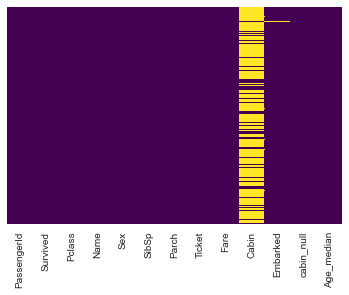

In [50]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
df.drop(labels='Cabin',axis=1,inplace=True)

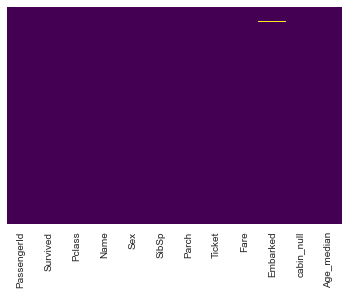

In [53]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,cabin_null,Age_median
61,62,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,NaN,0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,NaN,0,62.0


In [56]:
df.dropna(inplace=True)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,1,35.0


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'cabin_null', 'Age_median'],
      dtype='object')

In [61]:
df=df[['Age_median', 'Pclass', 'Sex', 'SibSp', 'Parch',
    'Fare','Embarked','Survived' ]]

In [62]:
df.head()

,Age_median,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,22.0,3,male,1,0,7.2500,S,0
1,38.0,1,female,1,0,71.2833,C,1
2,26.0,3,female,0,0,7.9250,S,1
3,35.0,1,female,1,0,53.1000,S,1
4,35.0,3,male,0,0,8.0500,S,0


In [88]:
df.dtypes

Age_median    float64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Survived        int64
dtype: object

Converting Categorical

In [66]:
encoded_df=pd.get_dummies(data=df,columns=['Embarked','Sex'],drop_first=True)

In [67]:
encoded_df.head()

,Age_median,Pclass,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S,Sex_male
0,22.0,3,1,0,7.2500,0,0,1,1
1,38.0,1,1,0,71.2833,1,0,0,0
2,26.0,3,0,0,7.9250,1,0,1,0
3,35.0,1,1,0,53.1000,1,0,1,0
4,35.0,3,0,0,8.0500,0,0,1,1


In [87]:
encoded_df.dtypes

Age_median    float64
Pclass          int64
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Embarked_Q      uint8
Embarked_S      uint8
Sex_male        uint8
dtype: object

# Building Logistic Regression

In [68]:
x=encoded_df.drop(labels='Survived',axis=1)
y=encoded_df['Survived']

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logreg=LogisticRegression()

In [75]:
logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
pred=logreg.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
acc=confusion_matrix(y_test,pred)

In [79]:
acc

array([[97, 13],
       [21, 47]], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy=accuracy_score(y_test,pred)

In [82]:
accuracy

0.8089887640449438

# EDA using Pandas_profiling

In [1]:
from pandas_profiling import ProfileReport

In [4]:
Profile=ProfileReport(df,title='Pandas Profiling Report',explorative=True)

In [5]:
Profile.to_widgets()

## build a html type report 

In [11]:
Profile.to_file("Pandas_report.html")

### but Pandas Profiling will not work properly when we have many features or records in datset, so in this case we can use SweetViz!

In [10]:
import sweetviz

In [12]:
my_report=sweetviz.analyze([df,"Titanic_Dataset"],target_feat="Survived")  

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [13]:
my_report.show_html("Sweetviz_report.html")

Report Sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


These powerful tool reduces the lines of coding to a drastic level!